In [1]:
import pandas as pd
import os

In [2]:
import torch
from transformers import pipeline

# model_id = "meta-llama/Llama-3.2-3B-Instruct"
model_id = "/gpfs/projects/bsc14/abecerr1/hub/models--meta-llama--Llama-3.2-3B-Instruct/snapshots/0cb88a4f764b7a12671c53f0838cd831a0843b95"
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    # device="cuda",
    device_map="auto",
)

terminators = [
    pipe.tokenizer.eos_token_id,
    pipe.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

/gpfs/projects/bsc14/code/MultiSynDS/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]
Device set to use cuda:0


In [3]:
from src.data import files_to_df

sample_df_gen = files_to_df("output/samples/en/phase_1/generated")
sample_df_gen["filenameid"] = sample_df_gen["filenameid"].str.replace("_transformed_step1", "")

sample_df_orig = files_to_df("output/samples/en/phase_1/original")
sample_df = sample_df_orig.merge(sample_df_gen, on="filenameid", suffixes=("_orig", "_gen"))
sample_df

,filenameid,text_orig,text_gen
0,32997782,"In March 2017, a 67-year-old man with hyperten...",**Discharge Summary**\n\n**Patient Information...
1,31378248,A 50-year-old man presented to his primary car...,**Discharge Summary**\n\n**Patient Information...
2,33857916,A sixty-eight-year-old gentleman underwent ort...,**Discharge Summary**\n\n**Patient Information...
3,34530632,"A 70-year-old man (170 cm, 48 kg, American Soc...",**Discharge Summary**\n\n**Patient Information...
4,30785587,"A 51-year-old male, hypertensive patient, a fo...",**Discharge Summary**\n\n**Patient Information...


In [4]:
import json
from ollama import chat

ModuleNotFoundError: No module named 'ollama'

In [ ]:
from ollama import generate

ocr = "First with a hood and stick in hand... After arresting protesters... What is it called??? or Carlos Roman Hamu"
text = ""

from ollama import chat
from ollama import ChatResponse

outputs: ChatResponse = chat(
    messages=[{
        "role": "system",
        "content": (
            "You are an expert recovering the image of a post from a social media platform only using the text and OCR of the post. "
            "Complete the post with the information from the image. Be concise and provide proper names if necessary. Be 100% confident in your answer. "
            "Provide only the description of the image. Provide always a description even if you don't know the answer, without justifying your decision, just as if it was real. "
            "Talk only about the content, not your reasoning."
        ),
    },
    {
        "role": "user",
        "content": f"The OCR of the post is: {ocr} The text of the post is: {text}",
    },],
    model="llama3.2"
)

outputs['message']['content']


'"Carlos Roman Hamu was arrested yesterday while holding a protest sign that read \'No to gentrification\'."'

In [ ]:
with open("utils/prompts/guidelines.txt", "r") as f:
    guidelines = f.read()

In [ ]:
with open("output/samples/en/phase_1/human_eval.csv", "r") as file:
    human_aval = file.read()

In [ ]:
import pandas as pd
from io import StringIO
data = pd.read_csv("output/samples/en/phase_1/human_eval.csv")
data.rename(columns={
    "Overall validation [Content Relevance]": "Content Relevance",
    "Overall validation [Information Completeness]": "Information Completeness ",
    "Overall validation [Clarity and Structure]": "Clarity and Structure ",
    "Overall validation [Content Accuracy]": "Content Accuracy ",
    "Overall validation [Hallucinations]": "Hallucinations ",
    "Overall validation [Impact of Hallucinations]": "Impact of Hallucinations ",
    "Overall validation [Relevance to Practice]": "Relevance to Practice ",
    "Overall validation [Overall Quality]": "Overall Quality ",
}, inplace=True)

data.head()

,Timestamp,Email Address,Original file name (e.g. 36951253),Content Relevance,Information Completeness,Clarity and Structure,Content Accuracy,Hallucinations,Impact of Hallucinations,Relevance to Practice,Overall Quality,Positive highlights: Describe what aspects of the synthetic discharge summaries resemble the best real EHRs? (Empty if nothing remarkable),Negative highlights: Which aspects of the synthetic discharge summaries do not resemble well real EHRs? (Empty if nothing remarkable),Other Comments: Do you have any other feedback or comment on the generated synthetic discharge summaries or in the original cases? (Empty if nothing remarkable)
0,1/6/2025 19:03:01,letifer28@gmail.com,33857916,1,1,4,2,1,1,1,2,Good structure.,Lack of information related with clinical cour...,NaN
1,1/6/2025 19:09:14,letifer28@gmail.com,34530632,5,4,5,5,1,1,5,4,Very good performance in general.,"Lack of some information e.g., desfibrillator ...",NaN
2,1/6/2025 19:13:58,letifer28@gmail.com,32997782,4,2,5,4,1,1,2,3,Very well structured and explained. Abbrevatio...,"The text has been oversummarized, leaving out ...",NaN
3,1/6/2025 19:18:27,letifer28@gmail.com,31378248,5,5,5,5,1,1,5,5,Highly accurate in the diagnosis.An excellent ...,Omited information: ECG Holter and EKG after C...,NaN
4,1/6/2025 19:21:19,letifer28@gmail.com,30785587,1,1,2,2,1,1,1,2,NaN,Too much information omitted and the text is o...,NaN


In [ ]:
columns_to_exclude = [
    "Email Address", "Timestamp"
]
data = data.drop(columns=columns_to_exclude)

In [ ]:
data_dict = data.to_dict(orient="records")
data_dict

[{'Original file name (e.g. 36951253)': 33857916,
  'Content Relevance': 1,
  'Information Completeness ': 1,
  'Clarity and Structure ': 4,
  'Content Accuracy ': 2,
  'Hallucinations ': 1,
  'Impact of Hallucinations ': 1,
  'Relevance to Practice ': 1,
  'Overall Quality ': 2,
  'Positive highlights: Describe what aspects of the synthetic discharge summaries resemble the best real EHRs? (Empty if nothing remarkable)': 'Good structure. ',
  'Negative highlights: Which aspects of the synthetic discharge summaries do not resemble well real EHRs? (Empty if nothing remarkable)': 'Lack of information related with clinical course and outcome. Patient evoluciton is not completly well explained. These parts are important in this case.',
  'Other Comments: Do you have any other feedback or comment on the generated synthetic discharge summaries or in the original cases? (Empty if nothing remarkable)': nan},
 {'Original file name (e.g. 36951253)': 34530632,
  'Content Relevance': 5,
  'Informat

In [ ]:
sample_df

,filenameid,text_orig,text_gen
0,32997782,"In March 2017, a 67-year-old man with hyperten...",**Discharge Summary**\n\n**Patient Information...
1,31378248,A 50-year-old man presented to his primary car...,**Discharge Summary**\n\n**Patient Information...
2,33857916,A sixty-eight-year-old gentleman underwent ort...,**Discharge Summary**\n\n**Patient Information...
3,34530632,"A 70-year-old man (170 cm, 48 kg, American Soc...",**Discharge Summary**\n\n**Patient Information...
4,30785587,"A 51-year-old male, hypertensive patient, a fo...",**Discharge Summary**\n\n**Patient Information...


In [ ]:
df_examples = pd.DataFrame(data_dict).rename(columns={"Original file name (e.g. 36951253)": "filenameid"})
df_examples

,filenameid,Content Relevance,Information Completeness,Clarity and Structure,Content Accuracy,Hallucinations,Impact of Hallucinations,Relevance to Practice,Overall Quality,Positive highlights: Describe what aspects of the synthetic discharge summaries resemble the best real EHRs? (Empty if nothing remarkable),Negative highlights: Which aspects of the synthetic discharge summaries do not resemble well real EHRs? (Empty if nothing remarkable),Other Comments: Do you have any other feedback or comment on the generated synthetic discharge summaries or in the original cases? (Empty if nothing remarkable)
0,33857916,1,1,4,2,1,1,1,2,Good structure.,Lack of information related with clinical cour...,NaN
1,34530632,5,4,5,5,1,1,5,4,Very good performance in general.,"Lack of some information e.g., desfibrillator ...",NaN
2,32997782,4,2,5,4,1,1,2,3,Very well structured and explained. Abbrevatio...,"The text has been oversummarized, leaving out ...",NaN
3,31378248,5,5,5,5,1,1,5,5,Highly accurate in the diagnosis.An excellent ...,Omited information: ECG Holter and EKG after C...,NaN
4,30785587,1,1,2,2,1,1,1,2,NaN,Too much information omitted and the text is o...,NaN


In [ ]:

import json


def model_evaluation(model, clinical_case, discharge_summary, filenames, output_file=None, human_eval_file=None, base_filenames_path=None):
    """
    Evaluate clinical case summaries against discharge summaries.
    
    Args:
        clinical_cases (list): List of clinical case texts.
        discharge_summaries (list): List of discharge summary texts.
        output_file (str): Path to save the output dictionary.
        generate_score (callable): Function to generate scores using the AI model.
    
    Returns:
        None
    """

    if (human_eval_file is not None) and (base_filenames_path is not None):
        df_human = load_human_eval(human_eval_file) 
        examples = create_example(filenames, df_human, base_filenames_path)
    else:
        print("\n\nNo human evaluation file provided. Skipping example generation.\n\n")
        examples = ""
    
    
    prompt = f"""Look at these guidelines carefully, i have also provided the dataset for you to analyze:
    
        Guidelines : One of the main bottlenecks for the development of clinical NLP resources if the lack of access to clinical records due to data privacy issues. This is particularly true for developments beyond English, as most of the accessible anonymized clinical record datasets are only available for this language.
        To examine if clinical case report publications could potentially be considered as a data source to generate synthetic clinical discharge summaries by means of generative AI solutions, prompt instructions combined with automatic clinical were applied.
        This structured summary has the purpose to systematically characterize the clinical language characteristics of synthetic discharge summaries.
        Each discharge summary was assessed for a predefined set of features.
        Likert scale features (to extract statistics) from 1 to 5:
        - Content Relevance: Does the summary focus on clinically relevant information
        - Information Completeness: Does the summary include all key details (diagnoses, treatments, follow-ups)?
        - Clarity and Structure: Is the information presented in a clear and logically structured manner like a real discharge report?
        - Content Accuracy: Does the report accurately reflect the clinical information provided in the input?
        - Hallucinations: Are there any factual inaccuracies or fabricated content in the summary?
        - Impact of Hallucinations: How severe are these hallucination (e.g. 1-2: Irrelevant content, 3: include details about the patients not in original, 4-5: medication doses, procedures, etc)
        - Relevance to Practice: Would this summary be usable in clinical practice without significant revision?
        - Overall Quality: How would you rate the overall quality of the discharge summary?
        Free text features to be commented in error analysis. Not mandatory but open to express as much or as few as wanted.
        - Positive/Negative highlights of generation process
        - Other comments on Generated/Original data sources
        
        Clinical Case : {clinical_case}
        Discharge Summary : {discharge_summary}
        
        Using these clinical case and discharge summary, evaluate and provide a score (1 to 5) for each feature listed above in the guidlines.
        Only provide numeric scores for each feature; do not include comments or explanations.
        Ensure that each score reflects a direct comparison of the clinical case and its corresponding discharge summary.
        Just provide the score for each feature, do not provide any additional information.
        Do not include any comments or explanations. before or after the scores
        
        Evaluate from 1 to five and return a json file with the following format:
        {{"Content Relevance": <score>, "Information Completeness": <score>, "Clarity and Structure": <score>, "Content Accuracy": <score>, "Hallucinations": <score>, "Impact of Hallucinations": <score>, "Relevance to Practice": <score>, "Overall Quality": <score>, "Positive/Negative highlights of generation process": <text>, "Other comments on Generated/Original data sources": <text>}}
        
        """
    
    for example in examples:
        prompt += example
        
    system_msg = "You are an expert in cardiology and you are asked to be very critical in your evaluation. Provide a score from 1 to 5 for each feature listed in the guidelines."
        
    messages = [
        {"role": "system", "content": system_msg},
        {"role": "user", "content": prompt},]
        # response = generate_score(prompt)
    
    print(prompt)

    terminators = [
        model.tokenizer.eos_token_id,
        model.tokenizer.convert_tokens_to_ids("<|eot_id|>")
    ]

    outputs = model(
                    messages,
                    max_new_tokens=1024,
                    temperature=0.01,
                    eos_token_id=terminators,
                    pad_token_id=model.tokenizer.eos_token_id,
                )

    gen_dictionary = outputs[0]["generated_text"][-1]["content"]
    
    try:
        return json.loads(gen_dictionary)
    except:
        print(gen_dictionary)
        return None
    
    # if output_file is not None:
    #     with open(output_file, "w") as f:
    #         json.dump(gen_dictionary, f)
    
    

import json
import pandas as pd

def load_human_eval(filename):
    df_human = pd.read_csv(filename)
    df_human.rename(columns={
        "Overall validation [Content Relevance]": "Content Relevance",
        "Overall validation [Information Completeness]": "Information Completeness ",
        "Overall validation [Clarity and Structure]": "Clarity and Structure ",
        "Overall validation [Content Accuracy]": "Content Accuracy ",
        "Overall validation [Hallucinations]": "Hallucinations ",
        "Overall validation [Impact of Hallucinations]": "Impact of Hallucinations ",
        "Overall validation [Relevance to Practice]": "Relevance to Practice ",
        "Overall validation [Overall Quality]": "Overall Quality ",
    }, inplace=True)

    columns_to_exclude = [
                            "Email Address", "Timestamp"
                            ]
    
    df_human = df_human.drop(columns=columns_to_exclude)
    df_human.rename(columns={"Original file name (e.g. 36951253)": "filenameid"}, inplace=True)
    return df_human

    
def create_example(filenames, df_human, base_path):
    examples = []  # List to store all examples
    for filename in filenames:
        # # Filter the row corresponding to the current filename in sample_df
        # sample_row = sample_df[sample_df["filenameid"] == str(filename)]
        
        # # Filter the row corresponding to the current filename in data_dict
        # row_data = next(row for row in data_dict if row["Original file name (e.g. 36951253)"] == filename)
        
        import glob
        gen_filename = glob.glob(os.path.join(base_path, f"generated/{filename}*.txt"))[0]
        orig_filename = glob.glob(os.path.join(base_path, f"original/{filename}*.txt"))[0]
        
        with open(gen_filename, "r") as f:
            discharge_summary = f.read()
        
        with open(orig_filename, "r") as f:
            clinical_case = f.read()
        
        df_human["filenameid"] = df_human["filenameid"].astype(str)
        row_data = df_human[df_human["filenameid"] == str(filename)].to_dict(orient="records")[0]
        # print(row_data)
        
        # clinical_case = row_data["text_orig"].values[0]
        # discharge_summary = row_data["text_gen"].values[0]
        
        
        # Extract all evaluation scores
        evaluation_scores = {
            "Content Relevance": row_data["Content Relevance"], 
                "Information Completeness": row_data["Information Completeness "], 
                "Clarity and Structure": row_data["Clarity and Structure "], 
                "Content Accuracy": row_data["Content Accuracy "], 
                "Hallucinations": row_data["Hallucinations "], 
                "Impact of Hallucinations": row_data["Impact of Hallucinations "], 
                "Relevance to Practice": row_data["Relevance to Practice "], 
                "Overall Quality": row_data["Overall Quality "],
                "Positive highlights of generation process": row_data["Positive highlights: Describe what aspects of the synthetic discharge summaries resemble the best real EHRs? (Empty if nothing remarkable)"],
                "Negative highlights of generation process": row_data["Negative highlights: Which aspects of the synthetic discharge summaries do not resemble well real EHRs? (Empty if nothing remarkable)"],
                "Other comments on Generated/Original data sources": row_data["Other Comments: Do you have any other feedback or comment on the generated synthetic discharge summaries or in the original cases? (Empty if nothing remarkable)"]
        }

        example = f"""EXAMPLE
            >>>
            Clinical Case : {clinical_case}
            Discharge Summary : {discharge_summary}
            Evaluation Scores : {evaluation_scores}
            >>>\n\n
            """
            # # Append the example to the list
        # print(example)
        examples.append(example)
        # print(example)
    return examples


clinical_case = sample_df["text_orig"].iloc[0]
discharge_summary = sample_df["text_gen"].iloc[0]
# filenames = [row["Original file name (e.g. 36951253)"] for row in data_dict[:1]]
filenames = ["33857916", "31378248"]

model_evaluation(pipe, clinical_case, discharge_summary,filenames, "hf", human_eval_file="output/samples/en/phase_1/human_eval.csv", base_filenames_path="output/samples/en/phase_1")


Look at these guidelines carefully, i have also provided the dataset for you to analyze:
    
        Guidelines : One of the main bottlenecks for the development of clinical NLP resources if the lack of access to clinical records due to data privacy issues. This is particularly true for developments beyond English, as most of the accessible anonymized clinical record datasets are only available for this language.
        To examine if clinical case report publications could potentially be considered as a data source to generate synthetic clinical discharge summaries by means of generative AI solutions, prompt instructions combined with automatic clinical were applied.
        This structured summary has the purpose to systematically characterize the clinical language characteristics of synthetic discharge summaries.
        Each discharge summary was assessed for a predefined set of features.
        Likert scale features (to extract statistics) from 1 to 5:
        - Content Relevanc

Here is the evaluation of the clinical case and discharge summary:

{
  "Content Relevance": 5,
  "Information Completeness": 5,
  "Clarity and Structure": 5,
  "Content Accuracy": 5,
  "Hallucinations": 1,
  "Impact of Hallucinations": 1,
  "Relevance to Practice": 5,
  "Overall Quality": 4,
  "Positive highlights of generation process": "Good structure. ",
  "Negative highlights of generation process": "Lack of information related with clinical course and outcome. Patient evoluciton is not completly well explained. These parts are important in this case.",
  "Other comments on Generated/Original data sources": "nan"
}


In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
import swifter

In [ ]:
scores = sample_df.progress_apply(lambda x: model_evaluation(pipe, x["text_orig"], x["text_gen"],filenames, "hf", human_eval_file="output/samples/en/phase_1/human_eval.csv", base_filenames_path="output/samples/en/phase_1"),
                                    axis=1)
# (x["text_orig"], x["text_gen"], guidelines), axis=1)

 40%|████      | 2/5 [00:02<00:04,  1.43s/it]

"Content Relevance": 5, "Information Completeness": 5, "Clarity and Structure": 4, "Content Accuracy": 4, "Hallucinations": 1, "Impact of Hallucinations": 1, "Relevance to Practice": 4, "Overall Quality": 4, "Positive highlights of generation process": "Good structure. ", "Negative highlights of generation process": "Lack of information related with clinical course and outcome. Patient evoluciton is not completly well explained. These parts are important in this case.", "Other comments on Generated/Original data sources": nan


 60%|██████    | 3/5 [00:05<00:04,  2.08s/it]

"Content Relevance": 5, "Information Completeness": 5, "Clarity and Structure": 5, "Content Accuracy": 5, "Hallucinations": 1, "Impact of Hallucinations": 1, "Relevance to Practice": 5, "Overall Quality": 5, "Positive highlights of generation process": "Highly accurate in the diagnosis.An excellent overall performance", "Negative highlights of generation process": "Omited information: ECG Holter and EKG after CV (both are important in FA clinical cases)", "Other comments on Generated/Original data sources": nan


 80%|████████  | 4/5 [00:08<00:02,  2.38s/it]

"Content Relevance": 5, "Information Completeness": 5, "Clarity and Structure": 4, "Content Accuracy": 2, "Hallucinations": 1, "Impact of Hallucinations": 1, "Relevance to Practice": 1, "Overall Quality": 2, "Positive highlights of generation process": "Good structure. ", "Negative highlights of generation process": "Lack of information related with clinical course and outcome. Patient evoluciton is not completly well explained. These parts are important in this case.", "Other comments on Generated/Original data sources": nan


100%|██████████| 5/5 [00:11<00:00,  2.49s/it]

"Content Relevance": 5, "Information Completeness": 5, "Clarity and Structure": 5, "Content Accuracy": 5, "Hallucinations": 1, "Impact of Hallucinations": 1, "Relevance to Practice": 5, "Overall Quality": 5, "Positive highlights of generation process": "Highly accurate in the diagnosis.An excellent overall performance", "Negative highlights of generation process": "Omited information: ECG Holter and EKG after CV (both are important in FA clinical cases)", "Other comments on Generated/Original data sources": nan


100%|██████████| 5/5 [00:14<00:00,  2.95s/it]

Here are the scores for each feature:

"Content Relevance": 5, "Information Completeness": 5, "Clarity and Structure": 5, "Content Accuracy": 5, "Hallucinations": 1, "Impact of Hallucinations": 1, "Relevance to Practice": 5, "Overall Quality": 5, "Positive highlights of generation process": "Highly accurate in the diagnosis.An excellent overall performance", "Negative highlights of generation process": 'Omited information: ECG Holter and EKG after CV (both are important in FA clinical cases)', "Other comments on Generated/Original data sources": nan


In [17]:
scores

0     {'Content Relevance': 5, 'Information Complete...
1     {'Content Relevance': 5, 'Information Complete...
2     {'Content Relevance': 4, 'Information Complete...
3     {'Content Relevance': 4, 'Information Complete...
4     {'Content Relevance': 5, 'Information Complete...
5     {'Content Relevance': 5, 'Information Complete...
6     {'Content Relevance': 5, 'Information Complete...
7     {'Content Relevance': 4, 'Information Complete...
8     {'Content Relevance': 4, 'Information Complete...
9     {'Content Relevance': 4, 'Information Complete...
10    {'Content Relevance': 5, 'Information Complete...
11    {'Content Relevance': 5, 'Information Complete...
12    {'Content Relevance': 5, 'Information Complete...
13    {'Content Relevance': 4, 'Information Complete...
14    {'Content Relevance': 5, 'Information Complete...
15    {'Content Relevance': 5, 'Information Complete...
16    {'Content Relevance': 5, 'Information Complete...
17    {'Content Relevance': 5, 'Information Comp

In [10]:
import pandas as pd

In [11]:

sample_df_scores = pd.concat([sample_df, pd.DataFrame(scores.dropna().tolist())], axis=1).rename(columns={0: "scores"})

In [12]:
sample_df_scores.columns

Index(['filenameid', 'text_orig', 'text_gen', 'Content Relevance',
       'Information Completeness', 'Clarity and Structure', 'Content Accuracy',
       'Hallucinations', 'Impact of Hallucinations', 'Relevance to Practice',
       'Overall Quality', 'Positive/Negative highlights of generation process',
       'Other comments on Generated/Original data sources'],
      dtype='object')

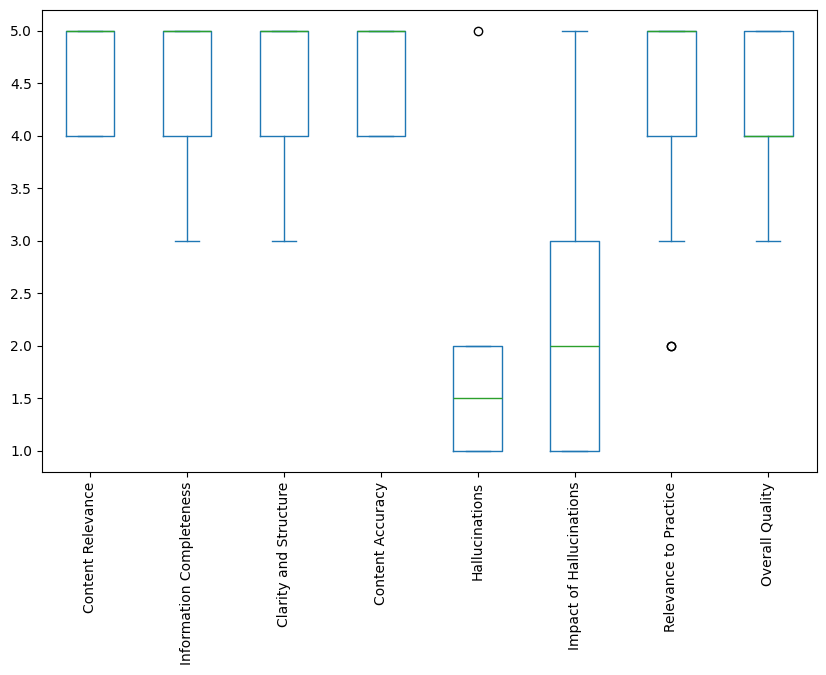

In [13]:
import matplotlib.pyplot as plt

sample_df_scores.plot(kind="box", y=['Content Relevance',
       'Information Completeness', 'Clarity and Structure', 'Content Accuracy',
       'Hallucinations', 'Impact of Hallucinations', 'Relevance to Practice',
       'Overall Quality'],
               figsize=(10, 6))
plt.xticks(rotation=90);

In [14]:
sample_df_scores[sample_df_scores["Other comments on Generated/Original data sources"] != ""]["Other comments on Generated/Original data sources"].tolist()

['The generated discharge summary was well-structured and easy to understand, with no significant differences between the original clinical case and the generated discharge summary.',
 "The original clinical case and discharge summary provided a comprehensive and detailed account of the patient's condition.",
 "The original clinical case provides detailed information about the patient's condition and the Heartfelt device's functionality.",
 "The original clinical case and discharge summary provided a comprehensive and detailed account of the patient's condition, but the generated discharge summary could benefit from more specific information on the patient's laboratory results and treatment plan.",
 'The original clinical case and discharge summary were well-written and provided sufficient information for the generation process.',
 "The original clinical case and discharge summary provided a clear and concise presentation of the patient's medical history and treatment plan.",
 "The ori

In [15]:
sample_df_scores

,filenameid,text_orig,text_gen,Content Relevance,Information Completeness,Clarity and Structure,Content Accuracy,Hallucinations,Impact of Hallucinations,Relevance to Practice,Overall Quality,Positive/Negative highlights of generation process,Other comments on Generated/Original data sources
0,32153696,An 80-year-old man who worked as a constructio...,**Discharge Summary**\n\n**Patient Information...,5,5,5,5,1,1,5,5,The generated discharge summary accurately ref...,The generated discharge summary was well-struc...
1,32470561,A 46-years-old female was admitted to our depa...,**Discharge Summary**\n\n**Patient Information...,5,4,4,5,2,3,3,4,The generated discharge summary effectively co...,The original clinical case and discharge summa...
2,29617510,An 81-year-old male patient was admitted due t...,**Discharge Summary**\n\n**Patient Information...,4,4,3,4,2,3,4,3,,
3,38422307,A 43-year-old female patient with uterine diff...,**Discharge Summary**\n\n**Patient Information...,4,4,3,4,2,3,4,3,,
4,31204375,A 92-year-old man was admitted to our hospital...,**Discharge Summary**\n\n**Patient Information...,5,5,5,5,1,1,5,5,,
5,35414581,Patient information\nA woman in her 70s diagno...,**Discharge Summary**\n\n**Patient Information...,5,5,5,5,1,1,5,5,The discharge summary effectively conveys the ...,The original clinical case provides detailed i...
6,30072860_2,A 72-year-old man with a history of hypertensi...,**Discharge Summary**\n\n**Patient Information...,5,5,5,5,1,1,5,5,,
7,31056078,"Initial presentation\nA 55-year-old, Caucasian...",**Discharge Summary**\n\n**Patient Information...,4,4,3,4,2,3,4,3,,
8,31486515,A 57-year-old Caucasian man was admitted to th...,**Discharge Summary**\n\n**Patient Information...,4,3,4,4,5,5,2,3,The generated discharge summary was highly rel...,The original clinical case and discharge summa...
9,34962277,"A 60-year-old gentleman, with a history of dia...",**Discharge Summary**\n\n**Patient Information...,4,4,4,4,2,3,4,4,,


In [19]:
df_eval_p1

,Overall validation [Content Relevance],Overall validation [Information Completeness],Overall validation [Clarity and Structure],Overall validation [Content Accuracy],Overall validation [Hallucinations],Overall validation [Impact of Hallucinations],Overall validation [Relevance to Practice],Overall validation [Overall Quality],Positive highlights: Describe what aspects of the synthetic discharge summaries resemble the best real EHRs? (Empty if nothing remarkable),Negative highlights: Which aspects of the synthetic discharge summaries do not resemble well real EHRs? (Empty if nothing remarkable)
0,1,1,4,2,5,5,1,2,Good structure.,Lack of information related with clinical cour...
1,5,4,5,5,5,5,5,4,Very good performance in general.,"Lack of some information e.g., desfibrillator ..."
2,4,2,5,4,5,5,2,3,Very well structured and explained. Abbrevatio...,"The text has been oversummarized, leaving out ..."
3,5,5,5,5,5,5,5,5,Highly accurate in the diagnosis.An excellent ...,Omited information: ECG Holter and EKG after C...
4,1,1,2,2,5,5,1,2,NaN,Too much information omitted and the text is o...


In [20]:
df_eval_p1 = pd.read_csv("output/samples/en/phase_1/human_eval.csv")
df_eval_p1 = df_eval_p1.iloc[:, 3:]
df_eval_p1.columns = ["filenameid", 'Content Relevance', 'Information Completeness', 'Clarity and Structure', 'Content Accuracy',\
       'Hallucinations', 'Impact of Hallucinations', 'Relevance to Practice', 'Overall Quality',\
       'Positive/Negative highlights of generation process', 'Other comments on Generated/Original data sources'\
       ]

df_eval_p1

,filenameid,Content Relevance,Information Completeness,Clarity and Structure,Content Accuracy,Hallucinations,Impact of Hallucinations,Relevance to Practice,Overall Quality,Positive/Negative highlights of generation process,Other comments on Generated/Original data sources
0,1,1,4,2,5,5,1,2,Good structure.,Lack of information related with clinical cour...,NaN
1,5,4,5,5,5,5,5,4,Very good performance in general.,"Lack of some information e.g., desfibrillator ...",NaN
2,4,2,5,4,5,5,2,3,Very well structured and explained. Abbrevatio...,"The text has been oversummarized, leaving out ...",NaN
3,5,5,5,5,5,5,5,5,Highly accurate in the diagnosis.An excellent ...,Omited information: ECG Holter and EKG after C...,NaN
4,1,1,2,2,5,5,1,2,NaN,Too much information omitted and the text is o...,NaN
